## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 20
BATCH_SIZE = 1024
MOMENTUM = 0.95
P_wait = [5,10,25]

In [7]:
# 載入 callbacks: Earlystop
from keras.callbacks import EarlyStopping

results = {}
for p in P_wait:
    earlystop = EarlyStopping(monitor="Validation Accuracy", 
                          patience=p, 
                          verbose=1
                          )

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "patience=%s" % str(p)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0806 22:47:40.836239 11072 deprecation_wrapper.py:119] From C:\Python\V3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 22:47:40.867157 11072 deprecation_wrapper.py:119] From C:\Python\V3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 22:47:40.875136 11072 deprecation_wrapper.py:119] From C:\Python\V3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 22:47:40.978857 11072 deprecation_wrapper.py:119] From C:\Python\V3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0806 22:47:41.178323 11072 deprecation_wrapper.py:119] From C:\Python\V3\lib\site-packages\ke

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

C:\Python\V3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `Validation Accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 6s 112us/step - loss: 1.7405 - acc: 0.3916 - val_loss: 1.7846 - val_acc: 0.3904
Epoch 3/20
50000/50000 [==============================] - 6s 120us/step - loss: 1.6168 - acc: 0.4335 - val_loss: 1.6915 - val_acc: 0.4136
Epoch 4/20
50000/50000 [==============================] - 6s 127us/step - loss: 1.5431 - acc: 0.4594 - val_loss: 1.6283 - val_acc: 0.4302
Epoch 5/20
50000/50000 [==============================] - 6s 120us/step - loss: 1.4901 - acc: 0.4796 - val_loss: 1.5975 - val_acc: 0.4475
Epoch 6/20
50000/50000 [==============================] - 6s 119us/step - loss: 1.4435 - acc: 0.4946 - val_loss: 1.5531 - val_acc: 0.4515
Epoch 7/20
50000/50000 [==============================] - 6s 119us/step - loss: 1.4031 - acc: 0.5109 - val_loss: 1.5396 - val_acc: 0.4584
Epoch 8/20
50000/50000 [==============================] - 6s 119us/step - loss: 1.3672 - acc: 0.5237 - val_loss: 1.5200 - val_acc: 0.4670
Epoch 9/20
50000/50000 [=====================

C:\Python\V3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `Validation Accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 6s 122us/step - loss: 1.7465 - acc: 0.3938 - val_loss: 1.8159 - val_acc: 0.3835
Epoch 3/20
50000/50000 [==============================] - 6s 126us/step - loss: 1.6221 - acc: 0.4327 - val_loss: 1.7237 - val_acc: 0.4028
Epoch 4/20
50000/50000 [==============================] - 6s 128us/step - loss: 1.5507 - acc: 0.4601 - val_loss: 1.6431 - val_acc: 0.4209
Epoch 5/20
50000/50000 [==============================] - 6s 128us/step - loss: 1.4938 - acc: 0.4786 - val_loss: 1.6113 - val_acc: 0.4294
Epoch 6/20
50000/50000 [==============================] - 6s 129us/step - loss: 1.4480 - acc: 0.4943 - val_loss: 1.5760 - val_acc: 0.4456
Epoch 7/20
50000/50000 [==============================] - 6s 128us/step - loss: 1.4093 - acc: 0.5100 - val_loss: 1.5583 - val_acc: 0.4519
Epoch 8/20
50000/50000 [==============================] - 7s 135us/step - loss: 1.3730 - acc: 0.5209 - val_loss: 1.5390 - val_acc: 0.4583
Epoch 9/20
50000/50000 [=====================

C:\Python\V3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `Validation Accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 7s 135us/step - loss: 1.7467 - acc: 0.3873 - val_loss: 1.8245 - val_acc: 0.3690
Epoch 3/20
50000/50000 [==============================] - 7s 133us/step - loss: 1.6206 - acc: 0.4304 - val_loss: 1.6902 - val_acc: 0.4136
Epoch 4/20
50000/50000 [==============================] - 7s 133us/step - loss: 1.5458 - acc: 0.4583 - val_loss: 1.6345 - val_acc: 0.4241
Epoch 5/20
50000/50000 [==============================] - 7s 138us/step - loss: 1.4912 - acc: 0.4781 - val_loss: 1.6011 - val_acc: 0.4374
Epoch 6/20
50000/50000 [==============================] - 7s 134us/step - loss: 1.4465 - acc: 0.4934 - val_loss: 1.5732 - val_acc: 0.4468
Epoch 7/20
50000/50000 [==============================] - 7s 132us/step - loss: 1.4057 - acc: 0.5075 - val_loss: 1.5604 - val_acc: 0.4493
Epoch 8/20
50000/50000 [==============================] - 7s 133us/step - loss: 1.3725 - acc: 0.5213 - val_loss: 1.5361 - val_acc: 0.4600
Epoch 9/20
50000/50000 [=====================

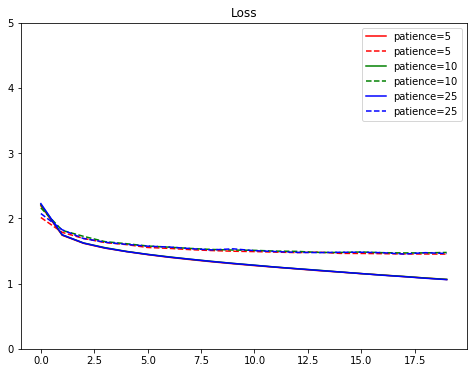

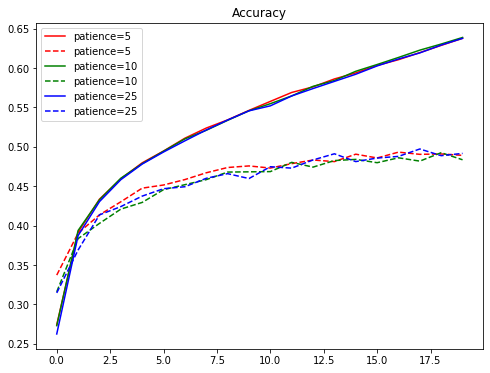

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()